Libraries

In [6]:
import numpy as np
import pandas as pd

Read the Dataset

In [7]:
import os
for dirname, _, filenames in os.walk('./netflix_titles'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [39]:
df = pd.read_csv("./netflix_titles.csv")

In [116]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",


In [41]:
df.shape

(7787, 12)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [43]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [44]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno #For missing values visualisation

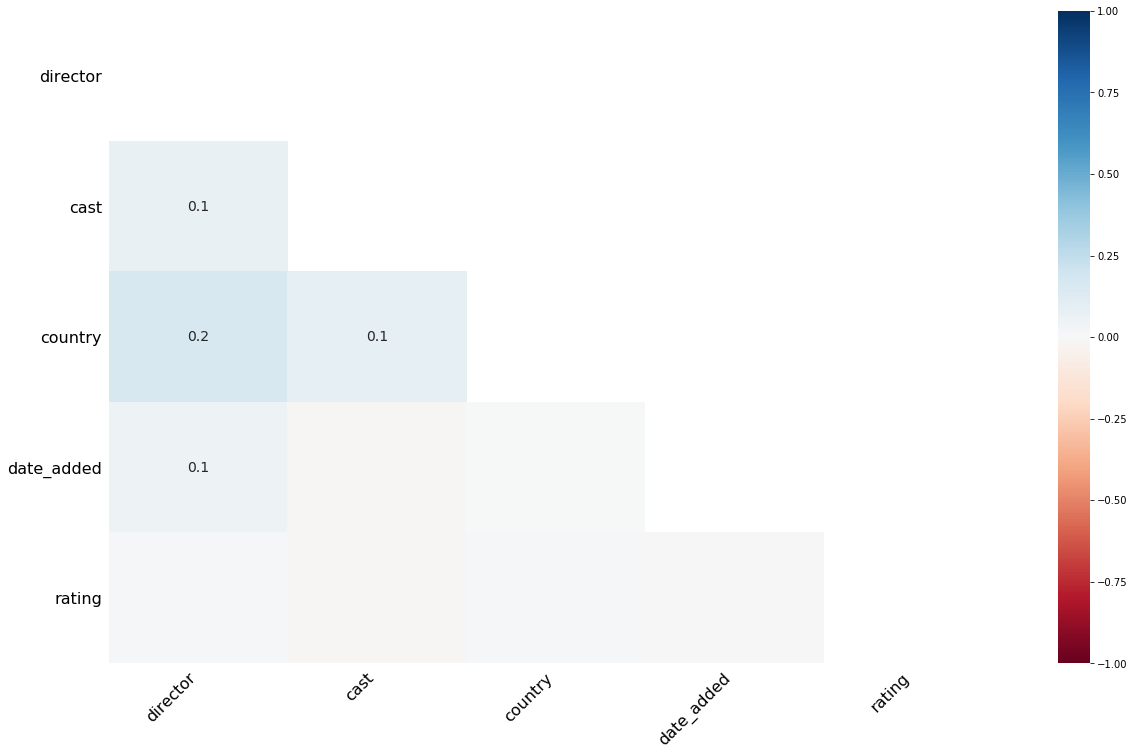

In [46]:
msno.heatmap(df)

# Data Cleaning

There are only seven NAN values in rating, so we will just put values.

In [55]:
changing_nan = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in changing_nan.items():
    df.iloc[id, 8] = rate
    
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [38]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2386
cast             718
country          506
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

Drop NAN values from cast

In [62]:
df = df[df['cast'].notna()]
df['cast'].isna().sum()

0

In [63]:
import collections

Replace NAN vlaues from country with the most common country value

In [65]:
collections.Counter(df['country']).most_common(1)

[('United States', 2251)]

In [66]:
df['country'] = df['country'].fillna('United States')
df['country'].isna().sum()

C:\Users\jinny\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [67]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data Visualisation

In [68]:
import pandas as pd
!pip install AutoViz
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [69]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [72]:
#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz("../input/netflix-shows/netflix_titles.csv")

File encoding decoder utf-8 does not work for this file
File encoding decoder iso-8859-11 does not work for this file
File encoding decoder cpl252 does not work for this file
File encoding decoder latin1 does not work for this file
None of the decoders work...
Not able to read or load file. Please check your inputs and try again...


Top oldest movies on Netflix

In [86]:
old = df.sort_values("release_year", ascending = True)
old = old[old['duration'] != ""]
old = old[old['type'] != "TV Show"]
old[['title', "release_year","country","duration"]][:15]

,title,release_year,country,duration
6117,The Battle of Midway,1942,United States,18 min
7268,Tunisian Victory,1944,"United States, United Kingdom",76 min
3425,Know Your Enemy - Japan,1945,United States,63 min
3608,Let There Be Light,1946,United States,58 min
7072,Thunderbolt,1947,United States,42 min
6141,The Blazing Sun,1954,Egypt,116 min
7595,White Christmas,1954,United States,120 min
5122,Rebel Without a Cause,1955,United States,111 min
6868,The Sign of Venus,1955,Italy,97 min
5425,Scandal in Sorrento,1955,"Italy, France",93 min


Top Newest movies on Netflix

In [89]:
new = df.sort_values("release_year", ascending = False)
new = new[new['duration'] != ""]
new = new[new['type'] != "TV Show"]
new[['title', 'release_year', 'country', 'duration']][:15]

,title,release_year,country,duration
5859,Stuck Apart,2021,Turkey,97 min
7220,Tribhanga - Tedhi Medhi Crazy,2021,United States,96 min
7644,Wish You,2021,United States,102 min
7569,What Would Sophia Loren Do?,2021,United States,32 min
5103,Ratones Paranoicos: The Band that Rocked Argen...,2021,United States,76 min
7551,What Happened to Mr. Cha?,2021,South Korea,102 min
4710,Outside the Wire,2021,United States,116 min
1355,Chris Rock Total Blackout: The Tamborine Exten...,2021,United States,98 min
1285,Charming,2021,"Canada, United States, Cayman Islands",85 min
4499,Nobody Knows I'm Here,2020,Chile,92 min


In [90]:
import plotly.express as px

In [93]:
#Country wise representation of all types
country  = df['country'].value_counts()
country = country[:15,]
fig = px.bar(x=country.index, y=country.values, color=country.values,
             hover_data=[country.index, country.values],labels={'country':'Frequency'}, height=400)
fig.show()

In [107]:
#Country wise representation of all movies
mv = df[df['type'] == 'Movie']
country  = mv['country'].value_counts()
country = country[:15,]
fig = px.bar(x=country.index, y=country.values, color=country.values,
             hover_data=[country.index, country.values],labels={'country':'Frequency'}, height=400)
fig.show()

In [106]:
#Country wise representation of all tv shows.

tv= df[df['type'] == 'TV Show']
country  = tv['country'].value_counts()
country = country[:15,]
fig = px.bar(x=country.index, y=country.values, color=country.values,
             hover_data=[country.index, country.values],labels={'country':'Frequency'}, height=400)
fig.show()

# Recommendation

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')

In [109]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [110]:
df['combined'] = df['description']+df['cast']+df['director']
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,A brilliant group of students become card-coun...


In [111]:
df['combined'] = df['combined'].fillna("")

In [112]:
tfv_matrix = tfv.fit_transform(df['combined'])
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)
sig[0]
 = pd.Series(df.index,index = df['title']).drop_duplicates()
indices

title
3%                          0
7:19                        1
23:59                       2
9                           3
21                          4
                         ... 
Zoom                     7781
Zozo                     7782
Zubaan                   7783
Zulu Man in Japan        7784
Zumbo's Just Desserts    7785
Length: 7069, dtype: int64

In [113]:
def recommend(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    movies_indices = [i[0] for i in sig_scores]
    return df['title'].iloc[movies_indices]

In [119]:
recommend('Payday')

7135    Tom Papa Live in New York City
2169                     Finding Agnes
2476                       Good Burger
3160                 Jewel's Catch One
7687                                XX
3012           Inside Man: Most Wanted
910       Bigflo & Oli: Hip Hop Frenzy
6738                 The Panti Sisters
2414               GIMS: On the Record
6814            The Republic of Imbaba
Name: title, dtype: object